In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

## CatBoost ÏßÑÌñâ
1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
2. SMOTE-NC Îç∞Ïù¥ÌÑ∞
3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
4. Í∞ÄÏ§ëÏπò

Î™®Îç∏ÎßÅ Í≥ºÏ†ïÏùÄ Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏùºÎã® ÏßÑÌñâÎê®.

### 1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú CAT ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [4]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/randomunder_modeling/train.csv")
test = pd.read_csv("data/train/randomunder_modeling/test.csv")

CatBoost ÌïôÏäµ

In [5]:
from catboost import CatBoostClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# Í∏∞Î≥∏Í∞íÏùÑ ÏÇ¨Ïö©Ìïú CatBoost Î™®Îç∏ ÏÉùÏÑ±
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

# Î™®Îç∏ ÌïôÏäµ
cat_model.fit(X_train, y_train)

0:	learn: 0.6821265	total: 157ms	remaining: 2m 36s
1:	learn: 0.6715672	total: 174ms	remaining: 1m 26s
2:	learn: 0.6620335	total: 195ms	remaining: 1m 4s
3:	learn: 0.6538409	total: 212ms	remaining: 52.8s
4:	learn: 0.6458380	total: 264ms	remaining: 52.5s
5:	learn: 0.6383034	total: 301ms	remaining: 49.9s
6:	learn: 0.6322618	total: 331ms	remaining: 47s
7:	learn: 0.6258236	total: 351ms	remaining: 43.5s
8:	learn: 0.6202641	total: 365ms	remaining: 40.2s
9:	learn: 0.6148841	total: 380ms	remaining: 37.7s
10:	learn: 0.6089928	total: 417ms	remaining: 37.5s
11:	learn: 0.6041250	total: 456ms	remaining: 37.6s
12:	learn: 0.5993582	total: 477ms	remaining: 36.2s
13:	learn: 0.5951858	total: 498ms	remaining: 35s
14:	learn: 0.5909986	total: 532ms	remaining: 35s
15:	learn: 0.5875805	total: 563ms	remaining: 34.7s
16:	learn: 0.5844212	total: 582ms	remaining: 33.6s
17:	learn: 0.5814169	total: 610ms	remaining: 33.3s
18:	learn: 0.5778725	total: 626ms	remaining: 32.3s
19:	learn: 0.5749776	total: 638ms	remaining: 

Test Accuracy: 0.80

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1932419
           1       0.03      0.74      0.05     13176

    accuracy                           0.80   1945595
   macro avg       0.51      0.77      0.47   1945595
weighted avg       0.99      0.80      0.88   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1553465  378954]
 [   3425    9751]]


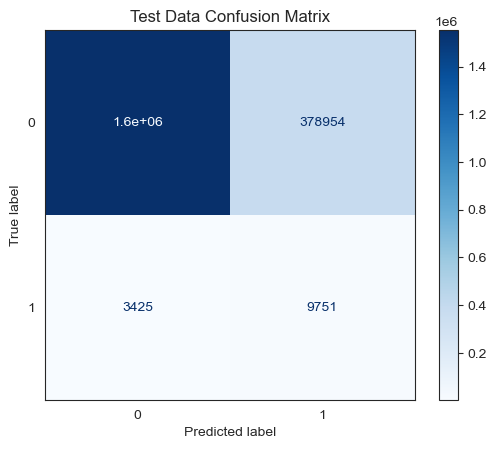

Test AUC-ROC: 0.85


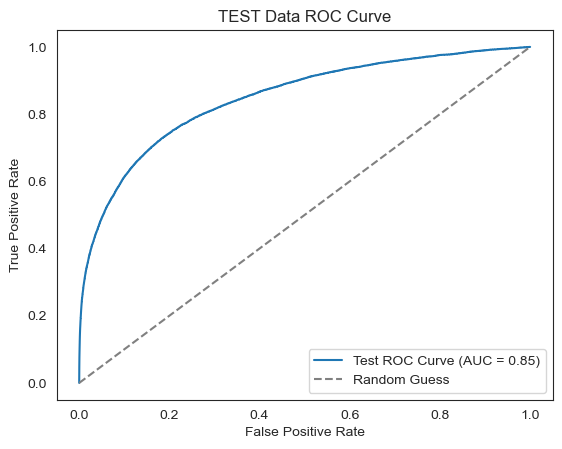

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = cat_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

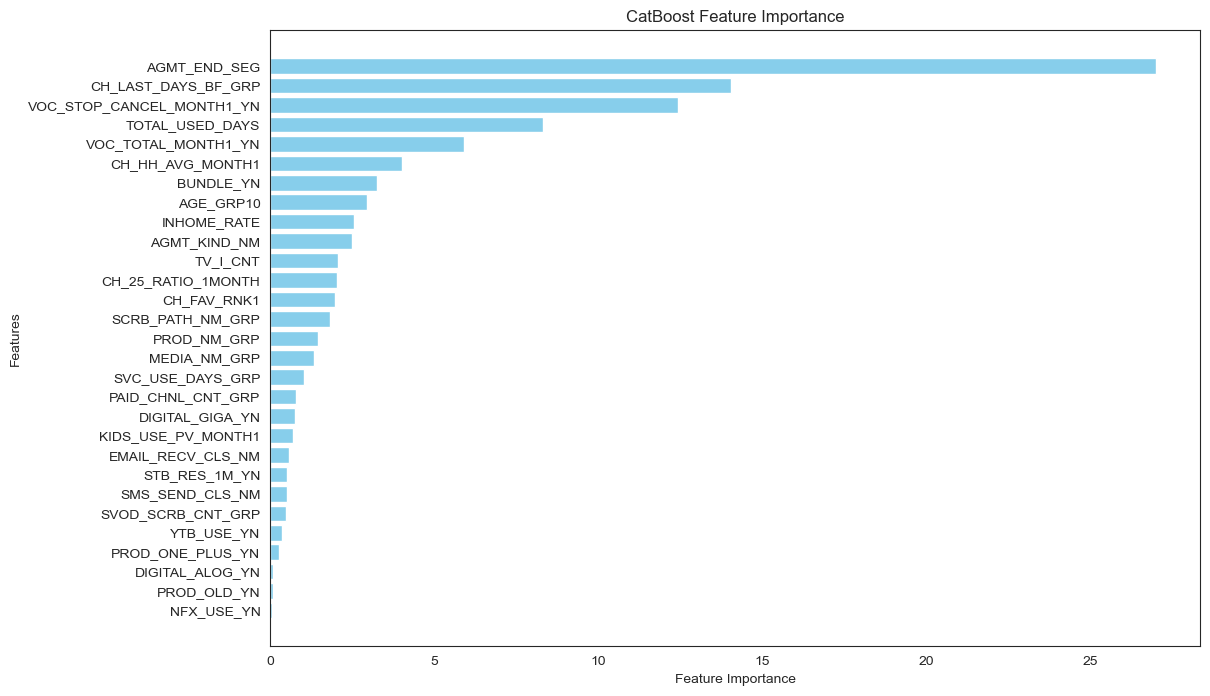

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance Ï∂îÏ∂ú
feature_importance = cat_model.get_feature_importance()

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


---

### 2. SMOTE-NC Îç∞Ïù¥ÌÑ∞Î°ú CatBoost ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [9]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/smote_modeling/train.csv")
test = pd.read_csv("data/train/smote_modeling/test.csv")

CatBoost ÌïôÏäµ

In [10]:
from catboost import CatBoostClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

cat_model.fit(X_train, y_train)

0:	learn: 0.6773221	total: 1.1s	remaining: 18m 15s
1:	learn: 0.6620040	total: 2.29s	remaining: 19m 5s
2:	learn: 0.6486060	total: 3.47s	remaining: 19m 13s
3:	learn: 0.6355061	total: 4.61s	remaining: 19m 8s
4:	learn: 0.6236640	total: 6.12s	remaining: 20m 18s
5:	learn: 0.6123607	total: 7.4s	remaining: 20m 26s
6:	learn: 0.6017373	total: 8.85s	remaining: 20m 55s
7:	learn: 0.5934234	total: 10.2s	remaining: 21m 1s
8:	learn: 0.5848248	total: 12.1s	remaining: 22m 8s
9:	learn: 0.5761954	total: 13.6s	remaining: 22m 27s
10:	learn: 0.5692204	total: 14.5s	remaining: 21m 43s
11:	learn: 0.5632133	total: 15.5s	remaining: 21m 12s
12:	learn: 0.5538787	total: 16.4s	remaining: 20m 46s
13:	learn: 0.5461099	total: 18s	remaining: 21m 8s
14:	learn: 0.5408890	total: 19.4s	remaining: 21m 17s
15:	learn: 0.5352150	total: 20.5s	remaining: 21m
16:	learn: 0.5300458	total: 21.4s	remaining: 20m 36s
17:	learn: 0.5251151	total: 22.4s	remaining: 20m 19s
18:	learn: 0.5212805	total: 23.1s	remaining: 19m 55s
19:	learn: 0.514

Test Accuracy: 0.88

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1932419
           1       0.03      0.44      0.05     13176

    accuracy                           0.88   1945595
   macro avg       0.51      0.66      0.49   1945595
weighted avg       0.99      0.88      0.93   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1710119  222300]
 [   7422    5754]]


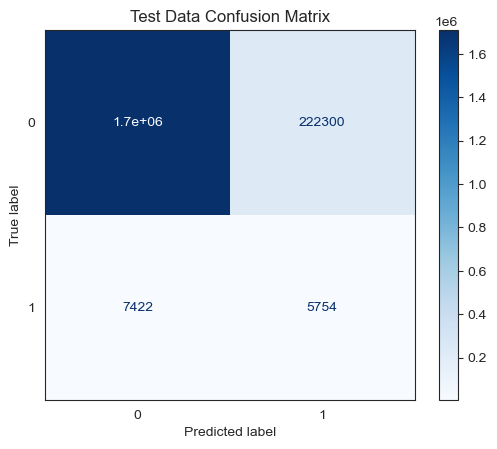

Test AUC-ROC: 0.74


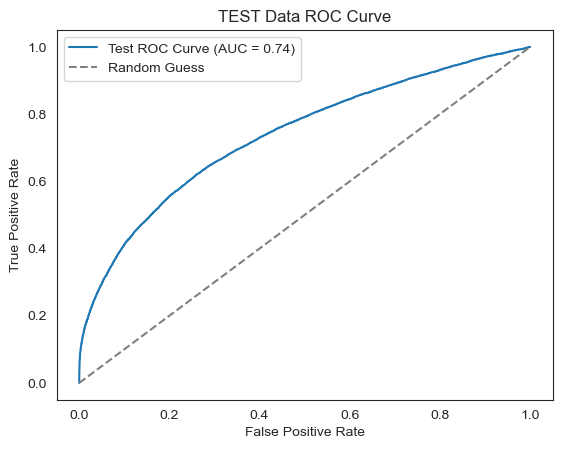

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = cat_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

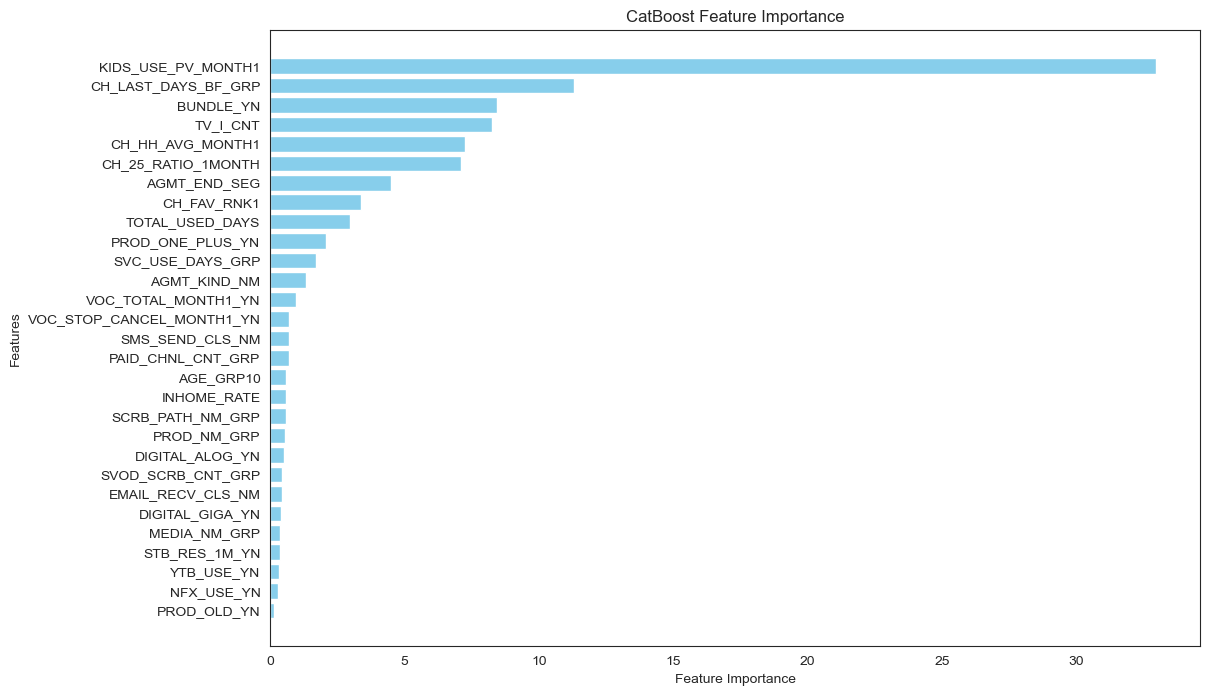

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance Ï∂îÏ∂ú
feature_importance = cat_model.get_feature_importance()

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú CatBoost ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [14]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/smoterandom_modeling/train.csv")
test = pd.read_csv("data/train/smoterandom_modeling/test.csv")

LGBM ÌïôÏäµ

In [15]:
from catboost import CatBoostClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

cat_model.fit(X_train, y_train)

0:	learn: 0.6750944	total: 840ms	remaining: 13m 58s
1:	learn: 0.6592288	total: 1.7s	remaining: 14m 5s
2:	learn: 0.6440390	total: 2.37s	remaining: 13m 6s
3:	learn: 0.6299341	total: 3.09s	remaining: 12m 50s
4:	learn: 0.6176206	total: 3.79s	remaining: 12m 34s
5:	learn: 0.6054795	total: 4.47s	remaining: 12m 20s
6:	learn: 0.5951195	total: 5.18s	remaining: 12m 15s
7:	learn: 0.5847498	total: 5.86s	remaining: 12m 6s
8:	learn: 0.5765122	total: 6.53s	remaining: 11m 59s
9:	learn: 0.5680998	total: 7.21s	remaining: 11m 53s
10:	learn: 0.5584953	total: 7.89s	remaining: 11m 49s
11:	learn: 0.5518412	total: 8.55s	remaining: 11m 43s
12:	learn: 0.5434730	total: 9.43s	remaining: 11m 56s
13:	learn: 0.5352130	total: 10.2s	remaining: 11m 55s
14:	learn: 0.5292416	total: 10.8s	remaining: 11m 52s
15:	learn: 0.5231268	total: 11.5s	remaining: 11m 49s
16:	learn: 0.5181203	total: 12.2s	remaining: 11m 44s
17:	learn: 0.5140010	total: 12.8s	remaining: 11m 40s
18:	learn: 0.5083063	total: 13.6s	remaining: 11m 42s
19:	lea

Test Accuracy: 0.91

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.92      0.95   1932419
           1       0.03      0.38      0.06     13176

    accuracy                           0.91   1945595
   macro avg       0.51      0.65      0.51   1945595
weighted avg       0.99      0.91      0.95   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1771766  160653]
 [   8189    4987]]


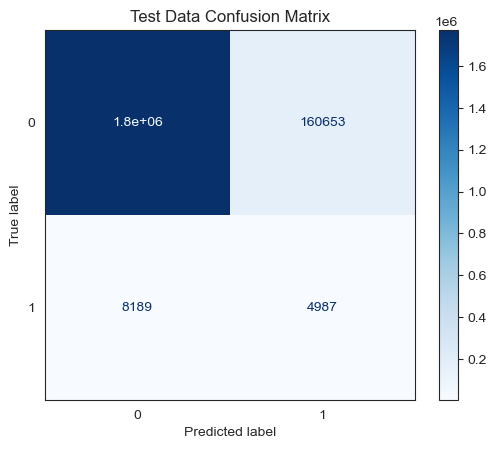

Test AUC-ROC: 0.74


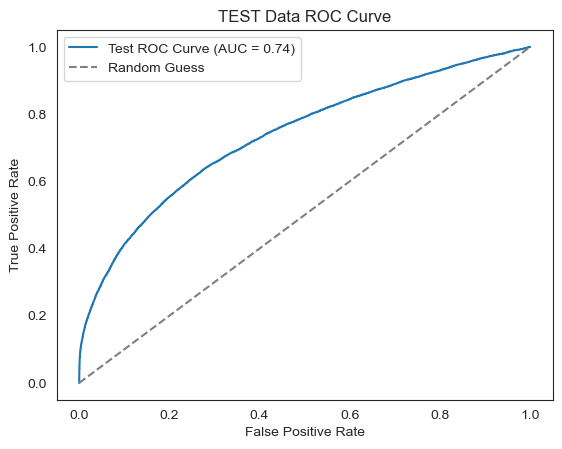

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = cat_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

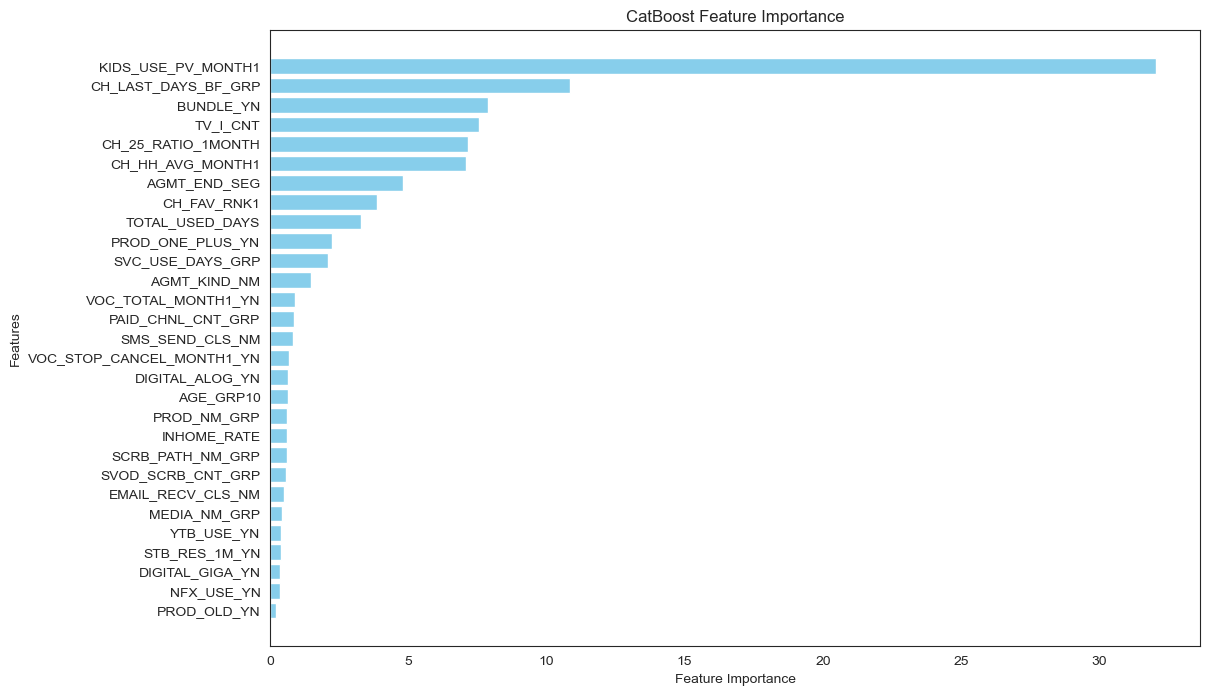

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance Ï∂îÏ∂ú
feature_importance = cat_model.get_feature_importance()

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 4. Í∞ÄÏ§ëÏπòÎ°ú CatBoost ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [19]:
train = pd.read_csv("data/train/train_weights.csv")
test = pd.read_csv("data/train/test.csv")

In [20]:
display(train)
display(test)

sha2_hash  \
0        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
3        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
4        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
...                                                                   ...   
3914836  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
3914837  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
3914838  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
3914839  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
3914840  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0           4     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1           5     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
2           4      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
3           5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
4           4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
...       ...              ...          ...         ...         ...   
3914836     5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
3914837     4          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
3914838     5          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
3914839     4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
3914840     5          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

        PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                      Y           Ïã†Í∑ú             N                0Í±¥   
1                      Y           Ïã†Í∑ú             N                0Í±¥   
2                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
4                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
...                  ...          ...           ...               ...   
3914836                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
3914837                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3914838                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3914839                N           Ïã†Í∑ú             N                0Í±¥   
3914840                N           Ïã†Í∑ú             N                0Í±¥   

        PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                      0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
1                      0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
2                      0Í±¥              I/B        30.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3                      0Í±¥              I/B        50.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
4                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                   ...              ...          ...           ...   
3914836                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
3914837                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3914838                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3914839                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
3914840                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

        AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN 

sha2_hash  \
0        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
2        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
3        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
4        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                   ...   
1945590  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
1945591  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
1945592  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
1945593  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
1945594  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0          11     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1          11     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
2          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
3          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
4          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
...       ...              ...          ...         ...         ...   
1945590    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
1945591    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1945592    11      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1945593    11          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
1945594    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

        PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
2                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3                      Y           Ïã†Í∑ú             N                0Í±¥   
4                      Y           Ïã†Í∑ú             N                1Í±¥   
...                  ...          ...           ...               ...   
1945590                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1945591                N           Ïã†Í∑ú             N                1Í±¥   
1945592                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
1945593                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1945594                N           Ïã†Í∑ú             N                0Í±¥   

        PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                      0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1                      0Í±¥              I/B        70.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
2                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî   
4                      1Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
...                   ...              ...          ...           ...   
1945590                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945591                0Í±¥              O/B        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945592                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945593                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1945594                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

        AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITA

In [21]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [22]:
train = train.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

In [23]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# Ïù∏ÏΩîÎî© ÌõÑ, Îã§Ïãú trainÍ≥º testÎ°ú Î∂ÑÎ¶¨

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ


In [24]:
for col, le in label_encoders.items():
    print(f"üîπ {col} Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

üîπ SVC_USE_DAYS_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå': 0, '24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå': 1, '36Í∞úÏõî Ïù¥ÏÉÅ': 2, '6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå': 3, '6Í∞úÏõîÎØ∏Îßå': 4}
------------------------------
üîπ MEDIA_NM_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'HD': 0, 'UHD': 1, 'Í∏∞ÌÉÄ': 2}
------------------------------
üîπ PROD_NM_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'Í∏∞ÌÉÄ': 0, 'Î≤†Ïù¥ÏßÅ': 1, 'ÏÑ∏Ïù¥Î≤Ñ': 2, 'Ïä§ÌÉ†Îã§Îìú': 3, 'Ïù¥ÏΩîÎÖ∏ÎØ∏': 4, 'ÌîÑÎ¶¨ÎØ∏ÏóÑ': 5}
------------------------------
üîπ PROD_OLD_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ PROD_ONE_PLUS_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ AGMT_KIND_NM Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'Ïã†Í∑ú': 0, 'ÏïΩÏ†ïÍ∞±Ïã†': 1, 'ÏïΩÏ†ïÏäπÍ≥Ñ': 2, 'ÏïΩÏ†ïÏó∞Ïû•': 3, 'ÏïΩÏ†ïÏ∂ïÏÜå': 4, 'Ïû¨ÏïΩÏ†ï': 5, 'Ï†ïÎ≥¥ÏóÜÏùå': 6}
------------------------------
üîπ STB_RES_1M_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ SVOD_SCRB_C

In [25]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplotÏúºÎ°ú ÌôïÏù∏Ìïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


CatBoost ÌïôÏäµ

In [26]:
from catboost import CatBoostClassifier

# Í∞ÄÏ§ëÏπò
# scale_pos_weight_value = train['churn'].value_counts()[0] / train['churn'].value_counts()[1]
# print(f"Calculated class weight for churn=1: {scale_pos_weight_value:.2f}")

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42,
    class_weights=[1, 5]
)

cat_model.fit(X_train, y_train)

0:	learn: 0.6689542	total: 770ms	remaining: 12m 49s
1:	learn: 0.6455999	total: 1.5s	remaining: 12m 30s
2:	learn: 0.6239196	total: 2.22s	remaining: 12m 17s
3:	learn: 0.6069957	total: 2.93s	remaining: 12m 10s
4:	learn: 0.5899124	total: 3.7s	remaining: 12m 16s
5:	learn: 0.5742916	total: 4.37s	remaining: 12m 3s
6:	learn: 0.5596256	total: 5.02s	remaining: 11m 52s
7:	learn: 0.5470217	total: 5.64s	remaining: 11m 39s
8:	learn: 0.5333042	total: 6.34s	remaining: 11m 38s
9:	learn: 0.5220075	total: 7.1s	remaining: 11m 42s
10:	learn: 0.5108674	total: 7.81s	remaining: 11m 42s
11:	learn: 0.5016987	total: 8.4s	remaining: 11m 31s
12:	learn: 0.4934108	total: 9.03s	remaining: 11m 25s
13:	learn: 0.4846890	total: 9.72s	remaining: 11m 24s
14:	learn: 0.4776892	total: 10.4s	remaining: 11m 19s
15:	learn: 0.4698709	total: 11.1s	remaining: 11m 20s
16:	learn: 0.4629189	total: 11.8s	remaining: 11m 21s
17:	learn: 0.4567741	total: 12.5s	remaining: 11m 19s
18:	learn: 0.4512147	total: 13s	remaining: 11m 12s
19:	learn:

Test Accuracy: 0.76

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.76      0.86   1932419
           1       0.02      0.58      0.03     13176

    accuracy                           0.76   1945595
   macro avg       0.51      0.67      0.45   1945595
weighted avg       0.99      0.76      0.86   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1473302  459117]
 [   5559    7617]]


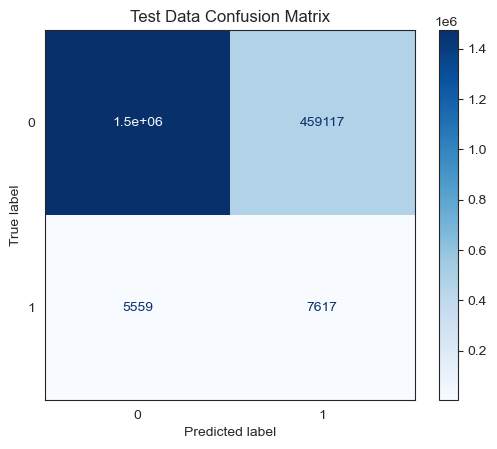

Test AUC-ROC: 0.73


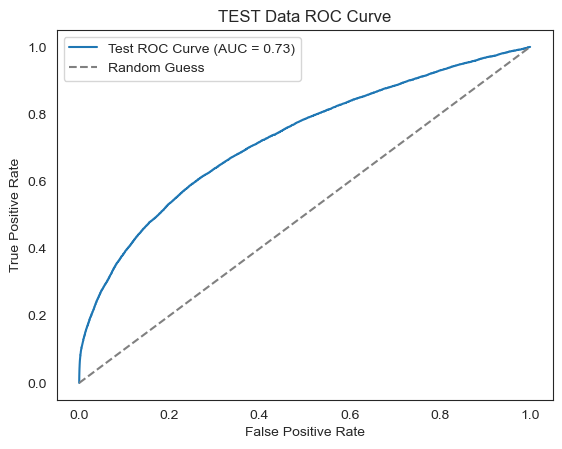

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = cat_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

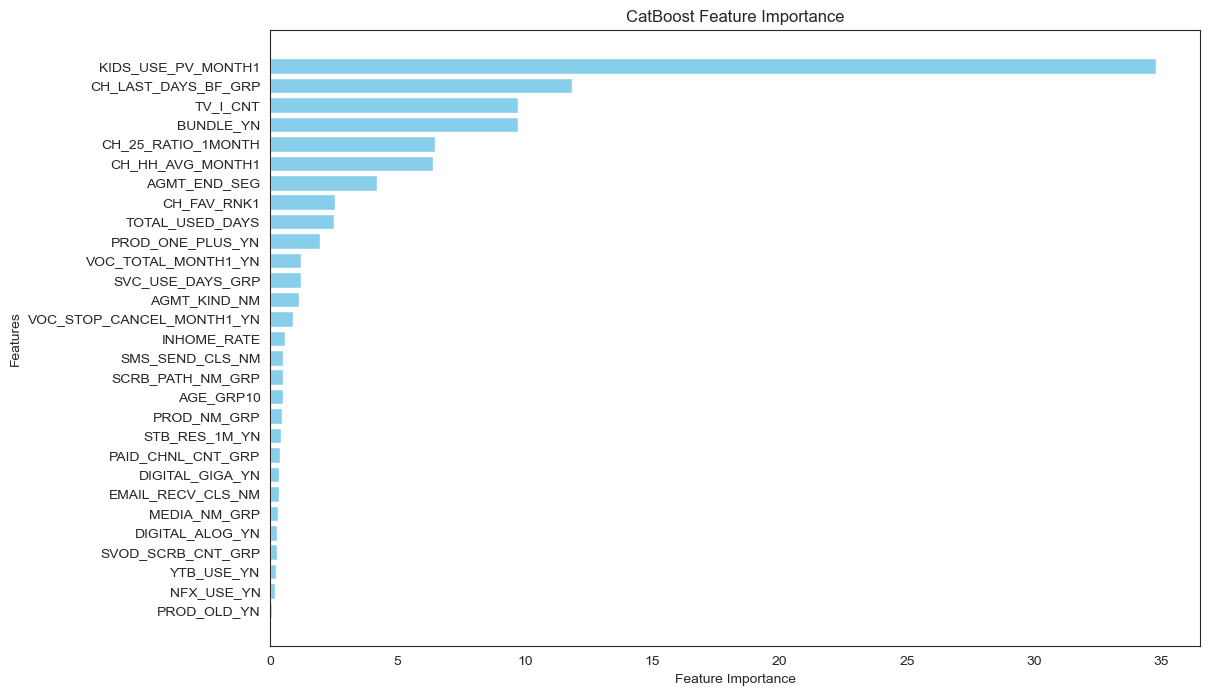

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance Ï∂îÏ∂ú
feature_importance = cat_model.get_feature_importance()

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### Í≤∞Î°†
CatBoostÎäî ÎûúÎç§ Ïñ∏ÎçîÎ•º ÌñàÏùÑ Îïå, Í∞ÄÏû• Ï¢ãÎã§

### üìå CatBoost ÏÑ±Îä• ÎπÑÍµê (Sampling Í∏∞Î≤ïÎ≥Ñ)

| ÏÉòÌîåÎßÅ Í∏∞Î≤ï             | Accuracy | 1Ïùò Recall | ROC-AUC |
|------------------------|----------|-----------|---------|
| <span style="color:red;">**ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ**</span>     | 0.80     | 0.72      | 0.84    |
| **SMOTE**              | 0.88     | 0.44      | 0.74    |
| **SMOTE + ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ** | 0.91     | 0.38      | 0.74    |
| **Í∞ÄÏ§ëÏπò Ï°∞Ï†ï**      | 0.76     | 0.58      | 0.73    |